In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.ticker as mtick

%matplotlib inline
sns.set_theme()

# Data Improt

In [2]:
data = pd.read_excel("Dataset_CW1.xlsx")
data.head()

,Company,Industry,Exchange,Country,StockPrice,StockPriceChange,Trading Volume,StockOutstanding,MarketCap,TotalDebt,...,EV/ InvestedCapital,Value/BV of Capital,EV/Sales,EV/ Trailing Sales,Correlation,PayoutRatio,ROE,ROC,MarginNet,Net Income
0,@Road Inc,Telecom. Services,NDQ,US,5.23,-0.02,236397,54.8,319.60,0.0,...,28.44,2.56,2.68,2.36,0.25,0.0,0.09,1.57,0.15,11.4
1,1-800 Contacts Inc,Medical Supplies,NDQ,US,11.70,0.03,57921,13.3,151.90,24.4,...,2.17,2.13,0.82,0.74,-0.10,NaN,-0.01,0.27,0.00,-0.6
2,1-800-ATTORNEY Inc,Publishing,NDQ,US,1.01,0.00,1438,0.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,1-800-FLOWERS.COM,Internet,NDQ,US,6.42,-0.01,197850,65.2,422.90,5.9,...,2.63,2.23,0.57,0.57,0.97,0.0,0.04,0.11,0.01,7.8
4,1mage Software Inc,Computer Software/Svcs,NDQ,US,0.01,0.00,10200,3.3,0.03,0.4,...,NaN,NaN,0.24,0.22,0.44,NaN,NaN,NaN,-0.79,-1.1


## Industry Debt

In [3]:
x = data[["Country", "Industry", "TotalDebt"]].groupby(
    by = ["Country", "Industry"]
).mean()
x

TotalDebt
Country Industry                          
Foreign Advertising             308.933333
        Aerospace/Defense      1443.688889
        Air Transport           902.192308
        Apparel                  74.484615
        Auto & Truck          18518.476923
...                                    ...
US      Trucking                319.583871
        Water Utility           156.421429
        Wireless Networking     214.197872
        tural Gas (Distrib.)    831.375000
        tural Gas (Div.)       2023.026471

[190 rows x 1 columns]

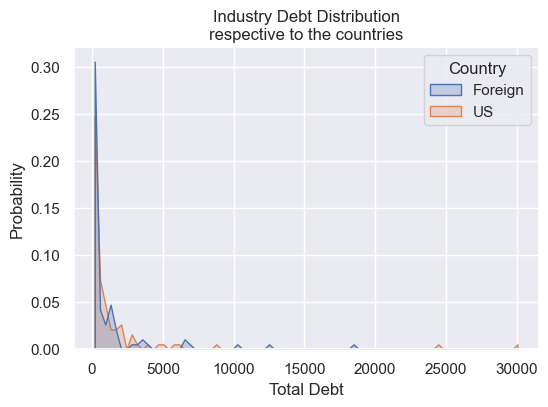

In [4]:
fig, ax = plt.subplots(1, 1, dpi = 100)


sns.histplot(
    x= "TotalDebt",
    hue = "Country",
    data = x,
    legend= True,
    bins = 'auto',
    element= 'poly',
    stat = "probability",
    ax = ax,
    # kde= True
    )

ax.set_xlabel("Total Debt")
plt.title("Industry Debt Distribution\nrespective to the countries")
plt.savefig(fname = "DebtDistributionCountries.png", dpi = 200, bbox_inches = 'tight')

In [5]:
x = data[["Country", "Industry", "TotalDebt"]].groupby(
    by = ["Country", "Industry"]
).mean()
x

TotalDebt
Country Industry                          
Foreign Advertising             308.933333
        Aerospace/Defense      1443.688889
        Air Transport           902.192308
        Apparel                  74.484615
        Auto & Truck          18518.476923
...                                    ...
US      Trucking                319.583871
        Water Utility           156.421429
        Wireless Networking     214.197872
        tural Gas (Distrib.)    831.375000
        tural Gas (Div.)       2023.026471

[190 rows x 1 columns]

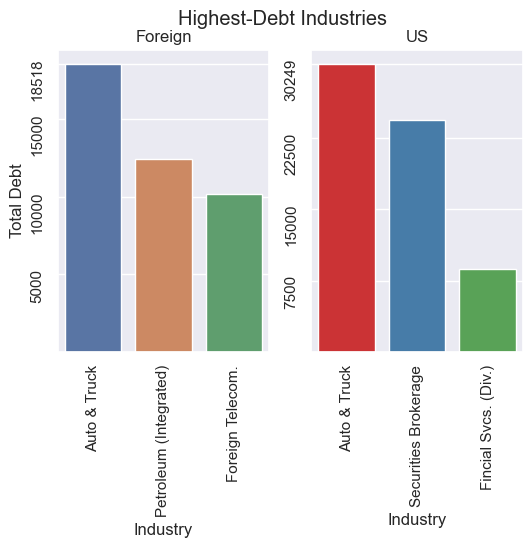

In [6]:
foreign_chart = x.loc['Foreign'].nlargest(3, columns = 'TotalDebt')
foreign_chart.reset_index(inplace = True)

us_chart = x.loc['US'].nlargest(3, columns = 'TotalDebt')
us_chart.reset_index(inplace= True)

fig, (ax1, ax2) = plt.subplots(1, 2, dpi = 100)
sns.barplot(x = "Industry", y = "TotalDebt", data =foreign_chart, ax = ax1)

pal1 = sns.color_palette("Set1")
sns.set_palette(pal1)
ax1.set_ylabel("Total Debt")
ax1.set_title("Foreign")
ax1.tick_params(labelrotation = 90)
ax1.set_yticks([5000, 10000, 15000, int(max(foreign_chart.TotalDebt))])


sns.barplot(x = "Industry", y = "TotalDebt", data =us_chart, ax = ax2)
pal2 = sns.color_palette("Set2")
sns.set_palette(pal2)
ax2.set_yticks([7500, 15000, 22500, int(max(us_chart.TotalDebt))])
ax2.set_title("US")
ax2.set_ylabel("")
ax2.tick_params(labelrotation = 90)
# ax2.set_yscale("log")


plt.suptitle("Highest-Debt Industries")
plt.savefig(fname = "TopDebtCountries.png", dpi = 200, bbox_inches = 'tight')

### Insights into the industries

#### US

In [7]:
companies_debt_us = data[(data["Industry"] == "Auto & Truck") & (data["Country"] == "US")]
companies_debt_us.head()

,Company,Industry,Exchange,Country,StockPrice,StockPriceChange,Trading Volume,StockOutstanding,MarketCap,TotalDebt,...,EV/ InvestedCapital,Value/BV of Capital,EV/Sales,EV/ Trailing Sales,Correlation,PayoutRatio,ROE,ROC,MarginNet,Net Income
25,A.S.V. Inc,Auto & Truck,NDQ,US,24.98,-0.02,157368,26.7,686.4,2.1,...,7.14,5.37,4.05,2.87,0.91,0.00,0.14,0.19,0.11,17.2
277,Allied Holdings Inc.,Auto & Truck,NDQ,US,0.60,0.09,80450,8.9,4.9,251.3,...,1.22,NaN,0.28,0.28,NaN,NaN,NaN,0.37,-0.06,-53.9
2448,Featherlite Mfg Inc,Auto & Truck,NDQ,US,4.22,-0.01,8791,10.8,47.5,43.5,...,1.43,1.43,0.50,0.42,0.45,0.00,0.03,0.08,0.00,0.7
2454,Federal Sigl,Auto & Truck,NYS,US,15.04,-0.01,181400,48.2,732.1,413.0,...,1.39,1.39,0.99,0.93,0.79,NaN,-0.03,0.03,-0.01,-12.7
2629,Ford Motor,Auto & Truck,NYS,US,7.70,-0.01,19568300,1830.9,14958.7,172973.0,...,0.99,0.99,0.90,0.98,0.95,0.17,0.26,0.13,0.02,4220.5


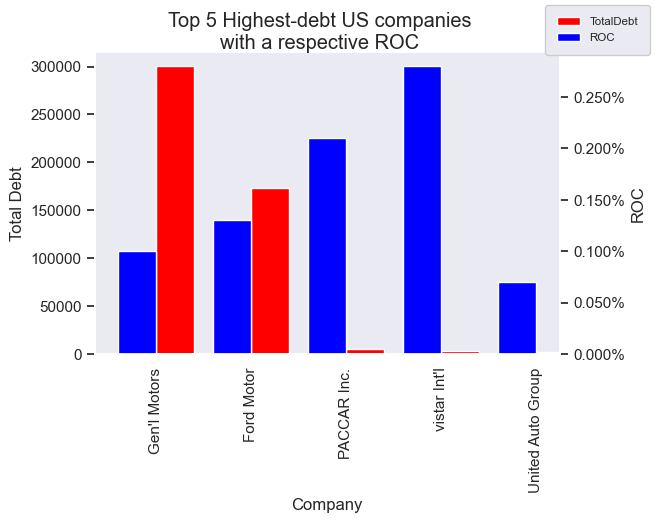

In [8]:
fig = plt.figure(dpi = 100)
ax = fig.add_subplot()
ax2 = plt.twinx()

width = 0.4

companies_debt_us.nlargest(5, "TotalDebt").plot(
    x = "Company",
    y = "TotalDebt",
    kind = 'bar',
    color = 'red',
    ax = ax,
    width = width,
    position = 0,
    legend = False
)

companies_debt_us.nlargest(5, "TotalDebt").plot(
    x = "Company",
    y = "ROC",
    kind = 'bar',
    color = 'blue',
    ax = ax2,
    width = width,
    position = 1,
    legend = False
)
ax.grid(False)
ax2.grid(False)

ax.set_ylabel("Total Debt")
ax2.set_ylabel("ROC")
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.figlegend(loc = 'upper right', framealpha=1, borderpad=1, fontsize = 'x-small')

plt.suptitle("Top 5 Highest-debt US companies\nwith a respective ROC")
plt.savefig(fname = "Plots\\Top5Debt_US.png", dpi = 200, bbox_inches = 'tight')

#### Foreign

In [9]:
companies_debt_foreign = data[(data["Industry"] == "Auto & Truck") & (data["Country"] == "Foreign")]
companies_debt_foreign.head()

,Company,Industry,Exchange,Country,StockPrice,StockPriceChange,Trading Volume,StockOutstanding,MarketCap,TotalDebt,...,EV/ InvestedCapital,Value/BV of Capital,EV/Sales,EV/ Trailing Sales,Correlation,PayoutRatio,ROE,ROC,MarginNet,Net Income
77,Accuride Corporation,Auto & Truck,NYS,Foreign,12.90,0.00,107000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1403,Chi Yuchai Intl Ltd,Auto & Truck,NYS,Foreign,7.81,-0.01,327100,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1588,Commercial Vehicle Group Inc,Auto & Truck,NDQ,Foreign,18.78,0.00,64225,18.0,389.0,53.9,...,2.70,2.69,1.16,0.67,NaN,0.00,0.17,0.22,0.05,18.5
1870,DaimlerChrysler AG,Auto & Truck,NYS,Foreign,50.89,-0.01,187100,1012.8,52028.8,84559.0,...,1.06,1.05,0.63,0.65,1.11,0.59,0.07,0.08,0.02,3338.0
2244,Empyrean Holdings Inc,Auto & Truck,NDQ,Foreign,0.01,0.00,2540214,61.0,0.9,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.3


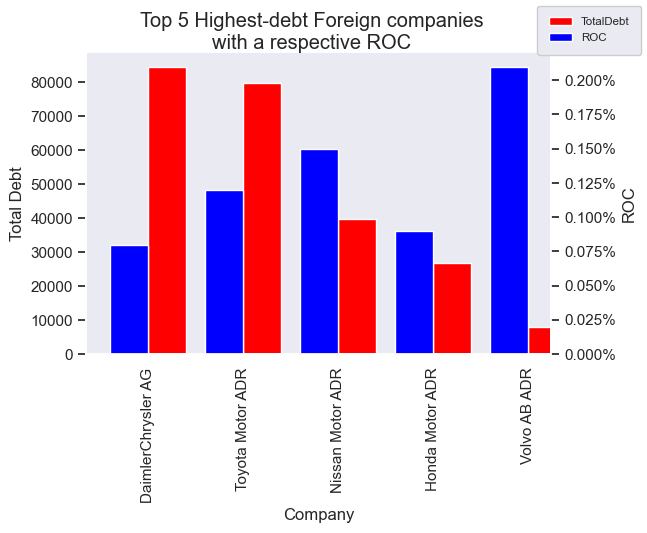

In [10]:
fig = plt.figure(dpi = 100)
ax = fig.add_subplot()
ax2 = plt.twinx()

width = 0.4

companies_debt_foreign.nlargest(5, "TotalDebt").plot(
    x = "Company",
    y = "TotalDebt",
    kind = 'bar',
    color = 'red',
    ax = ax,
    width = width,
    position = 0,
    legend = False
)

companies_debt_foreign.nlargest(5, "TotalDebt").plot(
    x = "Company",
    y = "ROC",
    kind = 'bar',
    color = 'blue',
    ax = ax2,
    width = width,
    position = 1,
    legend = False
)
ax.grid(False)
ax2.grid(False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_ylabel("Total Debt")
ax2.set_ylabel("ROC")
plt.figlegend(loc = 'upper right', framealpha=1, borderpad=1, fontsize = 'x-small')

plt.suptitle("Top 5 Highest-debt Foreign companies\nwith a respective ROC")
plt.savefig(fname = "Plots\\Top5Debt_Foreign.png", dpi = 200, bbox_inches = 'tight')

## Analysis
provide recommendations that address:
-   country
-   industry
-   financial information.

### Market

In [11]:
df_stock = data
m_industry = df_stock.groupby(by = "Industry").mean().loc[:, "StockPriceChange"]

In [12]:
m_industry[(m_industry <= 0.0001) & (m_industry >= -0.0001)]

Industry
Beverage (Alcoholic)    -4.731064e-19
Furn/Home Furnishings   -2.891206e-19
Name: StockPriceChange, dtype: float64

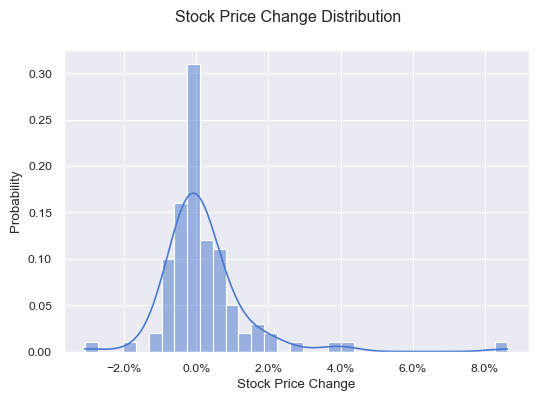

In [30]:
fig, ax = plt.subplots(1, 1, dpi= 100)

sns.histplot(
    data = m_industry,
    stat = 'probability',
    kde = True
    )

plt.suptitle('Stock Price Change Distribution')
ax.set_xlabel('Stock Price Change')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.savefig(fname = "StockPriceChangeDstribution.png", dpi = 200, bbox_inches = 'tight')

### Country

1. Top 3 stock price industry movers based on countries
- - get graph

In [14]:
x = data[["Country", "Industry", "StockPriceChange"]]
x = x.groupby(["Country", "Industry"]).mean()

print("\tForeign")
print(x.loc['Foreign'].nlargest(3, columns = 'StockPriceChange'))


print("\n\tUS")
print(x.loc['US'].nlargest(3, columns = 'StockPriceChange'))


	Foreign
                       StockPriceChange
Industry                               
Beverage (Soft Drink)          0.256667
Securities Brokerage           0.205000
Recreation                     0.115000

	US
                        StockPriceChange
Industry                                
Healthcare Information          0.043871
Hotel/Gaming                    0.033548
Foreign Electronics             0.030000


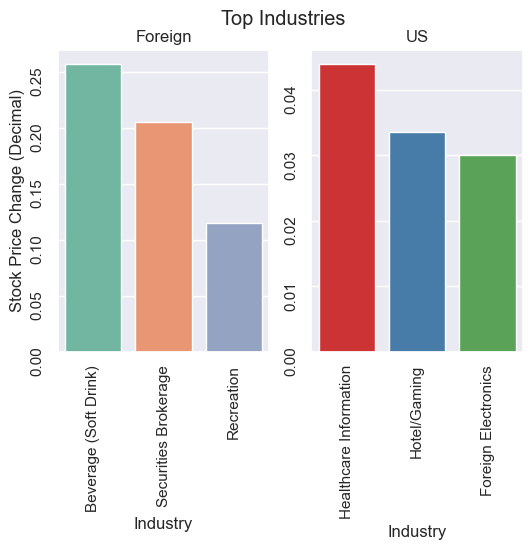

In [15]:
foreign_chart = x.loc['Foreign'].nlargest(3, columns = 'StockPriceChange')
foreign_chart.reset_index(inplace = True)

us_chart = x.loc['US'].nlargest(3, columns = 'StockPriceChange')
us_chart.reset_index(inplace= True)

fig, (ax1, ax2) = plt.subplots(1, 2, dpi = 100)
sns.barplot(x = "Industry", y = "StockPriceChange", data =foreign_chart, ax = ax1)

pal1 = sns.color_palette("Set1")
sns.set_palette(pal1)
ax1.set_title("Foreign")
ax1.tick_params(labelrotation = 90)
# ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_ylabel("Stock Price Change (Decimal)")


sns.barplot(x = "Industry", y = "StockPriceChange", data =us_chart, ax = ax2)
pal2 = sns.color_palette("Set2")
sns.set_palette(pal2)
ax2.set_title("US")
ax2.set_ylabel("")
ax2.tick_params(labelrotation = 90)
# ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.suptitle("Top Industries")

plt.savefig(fname = "TopIndustryCountries.png", dpi = 200, bbox_inches = 'tight')

2. Bottom 3 stock price industry movers based on countries
- - get graph

In [16]:
x = data[["Country", "Industry", "StockPriceChange"]]
x = x.groupby(["Country", "Industry"]).mean()

print("\tForeign")
print(x.loc['Foreign'].nsmallest(3, columns = 'StockPriceChange'))


print("\n\tUS")
print(x.loc['US'].nsmallest(3, columns = 'StockPriceChange'))


	Foreign
                      StockPriceChange
Industry                              
Toiletries/Cosmetics            -0.030
Bank (Midwest)                  -0.015
Electrical Equipment            -0.015

	US
                      StockPriceChange
Industry                              
Food Wholesalers             -0.048462
Entertainment                -0.019245
Securities Brokerage         -0.019130


## Industry
1. Top 5 stock price movers within an industry for a particular country

### - US

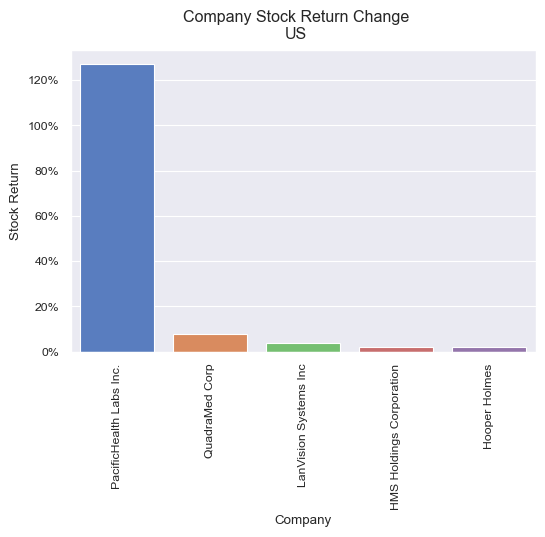

In [33]:
z = data[['Company', 'Industry', 'Country', 'StockPriceChange']]

z[(z.Country == 'US') & (z.Industry == 'Healthcare Information')].nlargest(5, 'StockPriceChange')

fig, ax = plt.subplots(1, 1, dpi = 100)
sns.barplot(
    x = "Company",
    y = "StockPriceChange",
    data = z[(z.Country == 'US') & (z.Industry == 'Healthcare Information')].nlargest(5, 'StockPriceChange'),
    ax = ax,
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylabel("Stock Return")
plt.xticks(rotation = 90)
plt.suptitle("Company Stock Return Change\nUS")

plt.savefig(fname = "CompanyStockReturnUS.png", dpi = 200, bbox_inches = 'tight')

### - Foreign

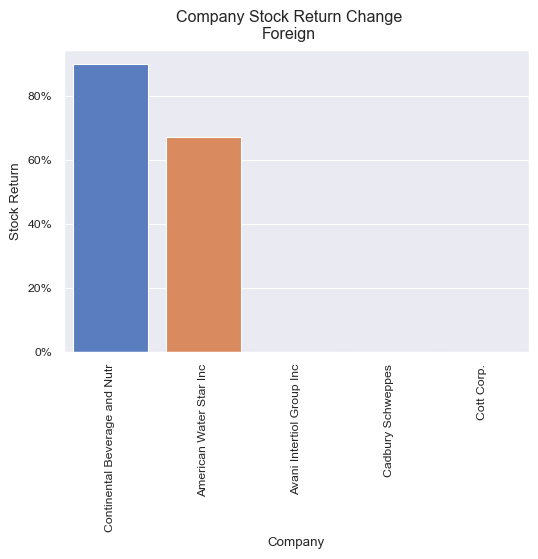

In [34]:
z = data[['Company', 'Industry', 'Country', 'StockPriceChange']]


z[(z.Country == 'Foreign') & (z.Industry == 'Beverage (Soft Drink)')].nlargest(5, 'StockPriceChange')


fig, ax = plt.subplots(1, 1, dpi = 100)

sns.barplot(
    x = "Company",
    y = "StockPriceChange",
    data = z[(z.Country == 'Foreign') & (z.Industry == 'Beverage (Soft Drink)')].nlargest(5, 'StockPriceChange'),
    ax = ax,
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylabel("Stock Return")
plt.xticks(rotation = 90)
plt.suptitle("Company Stock Return Change\nForeign")

plt.savefig(fname = "CompanyStockReturnForeign.png", dpi = 200, bbox_inches = 'tight')

## Financial Information

Comapany's ROC relative to other domestic industry incumbants

### PacificHealth Labs Inc.

In [19]:
q = data[(data['Country'] == 'US') & (data['Industry'] == 'Healthcare Information')]
q = q[['Company', 'ROC']].dropna()
q.set_index('Company', inplace = True)

q

,ROC
Company,
Allscripts Healthcare,0.07
Amer Retirement,0.17
Capital Senior Living,0.05
Celera Genomics,-0.68
Cerner Corp.,0.23
Continucare Corp,0.30
Eclipsys Corp.,-5.21
Emdeon Corp.,0.06
eResearchTechnology,1.85


In [20]:
q.loc['PacificHealth Labs Inc.'][0]

-2.57

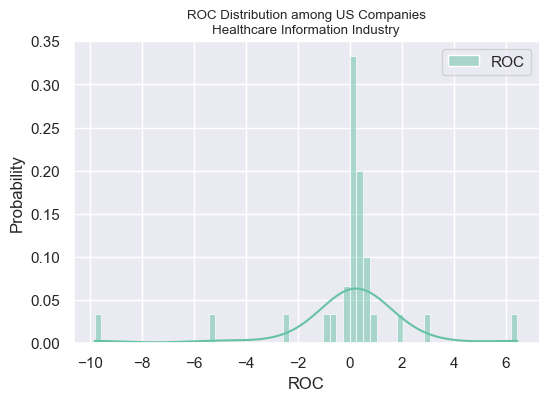

In [21]:
with sns.axes_style("darkgrid"):
    fig = plt.figure(dpi = 100)
    sns.histplot(data = q, stat = 'probability', kde = True)
    sns.set_context("paper")
    plt.title("ROC Distribution among US Companies\nHealthcare Information Industry")
    sns.despine(top = True, right = True)
    plt.xlabel("ROC")


plt.savefig(fname = "CompanyROCDistrubtionUS.png", dpi = 200, bbox_inches = 'tight')

### Continental Beverage and Nutr

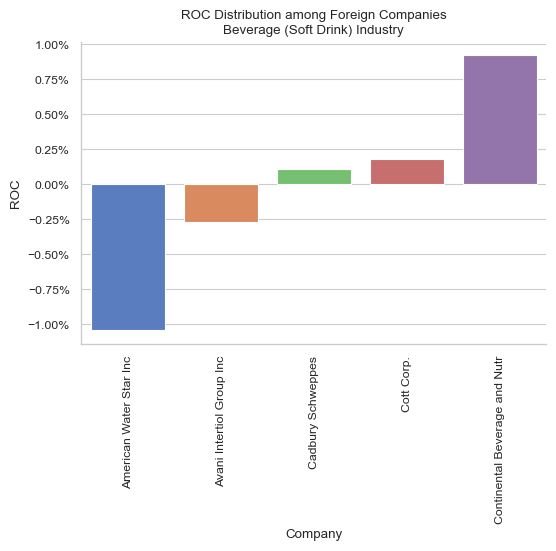

In [36]:
u = data[(data['Country'] == 'Foreign') & (data['Industry'] == 'Beverage (Soft Drink)')]
u = u[['Company', 'ROC']].dropna()
u = u.sort_values(by = 'ROC')

with sns.axes_style("whitegrid"):
    fig = plt.figure(dpi =100)
    ax = fig.add_subplot()
    sns.barplot(x = 'Company', y = 'ROC', data = u, ax = ax)
    plt.xticks(rotation = 90)
    sns.despine(top= True, right= True)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.title("ROC Distribution among Foreign Companies\nBeverage (Soft Drink) Industry")


plt.savefig(fname = "CompanyROCDistrubtionForeign.png", dpi = 200, bbox_inches = 'tight')

# Correlation

## Net income & Revenue

In [23]:
df_corr = data[["RevenueLastYear", "Net Income"]].dropna()

In [24]:
pearsonr(
    x = df_corr.RevenueLastYear,
    y = df_corr["Net Income"]
)

(0.7777280349477923, 0.0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Correlation - Revenue & Net Income'}, xlabel='Revenue\n(Log)', ylabel='Net Income\n(Log)'>

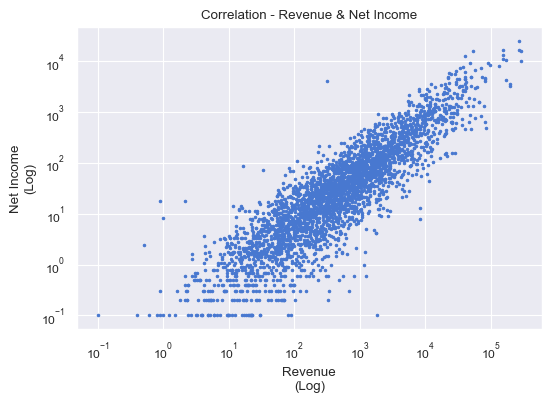

In [25]:
fig, ax = plt.subplots(dpi = 100)

sns.set_palette(sns.color_palette("muted"))
df_corr.plot.scatter(
        x = "RevenueLastYear",
        y = "Net Income",
        loglog = True,
        s = 3,
        ax = ax,
        title = "Correlation - Revenue & Net Income",
        xlabel = "Revenue\n(Log)",
        ylabel = "Net Income\n(Log)"
        )

# plt.savefig(fname = "CorrelationPlot(NetIncome_Revenue).png", dpi = 200, bbox_inches = 'tight')

## Revenue & Share Price

In [26]:
df_corr = data[["RevenueLastYear", "StockPrice"]].dropna()
df_corr

,RevenueLastYear,StockPrice
0,75.2,5.23
1,211.7,11.70
3,670.7,6.42
4,1.4,0.01
13,85.3,7.34
...,...,...
7106,378.9,16.21
7108,69.1,1.89
7109,142.2,14.69
7110,35.7,17.01


In [27]:
corr_rev_st = pearsonr(
    x = df_corr.RevenueLastYear,
    y = df_corr.StockPrice
)
print(f"""
Pearson correlation coefficient:\t{corr_rev_st[0]}
P-Value:\t\t\t\t{corr_rev_st[1]}
""")


Pearson correlation coefficient:	0.14636145576233422
P-Value:				2.0615939857651786e-26



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Correlation - Revenue & Share Price'}, xlabel='Revenue\n(Log)', ylabel='Share Price\n(Log)'>

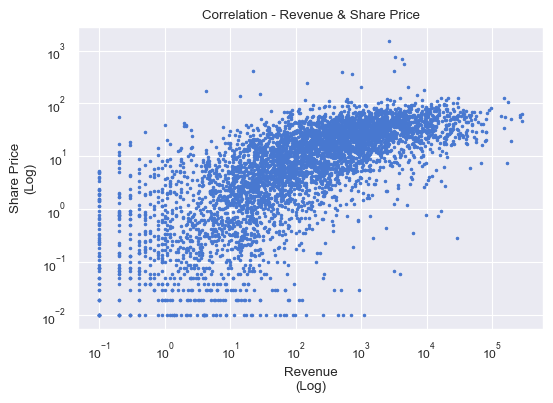

In [28]:
fig, ax = plt.subplots(dpi = 100)

sns.set_palette(sns.color_palette("muted"))
df_corr.plot.scatter(
        x = "RevenueLastYear",
        y = "StockPrice",
        loglog = True,
        s = 3,
        ax = ax,
        title = "Correlation - Revenue & Share Price",
        xlabel = "Revenue\n(Log)",
        ylabel = "Share Price\n(Log)"
        )

# plt.savefig(fname = "CorrelationPlot(SharePrice_Revenue).png", dpi = 200, bbox_inches = 'tight')
